In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create synthetic dataset
data = {
    "Email_Spend": np.random.normal(5000, 800, 50),
    "Social_Spend": np.random.normal(8000, 1200, 50),
    "SEO_Spend": np.random.normal(6000, 1000, 50),
    "PaidAds_Spend": np.random.normal(12000, 2000, 50),
}
df = pd.DataFrame(data)

# Simulate Revenue as dependent variable with some noise
df["Revenue"] = (
    1.5 * df["Email_Spend"] +
    2.0 * df["Social_Spend"] +
    1.8 * df["SEO_Spend"] +
    2.5 * df["PaidAds_Spend"] +
    np.random.normal(0, 5000, 50)
)

df.head()


,Email_Spend,Social_Spend,SEO_Spend,PaidAds_Spend,Revenue
0,3739.381516,8625.616953,6301.307689,11759.827529,77288.624944
1,5479.937028,8617.273510,6615.075843,12782.949228,64091.825190
2,4998.279092,7657.268954,4963.153159,11231.076244,55188.409780
3,5185.099752,8495.822599,5595.358755,12388.587520,74608.014549
4,3283.226834,7447.024972,4456.992326,11852.107928,56268.768980


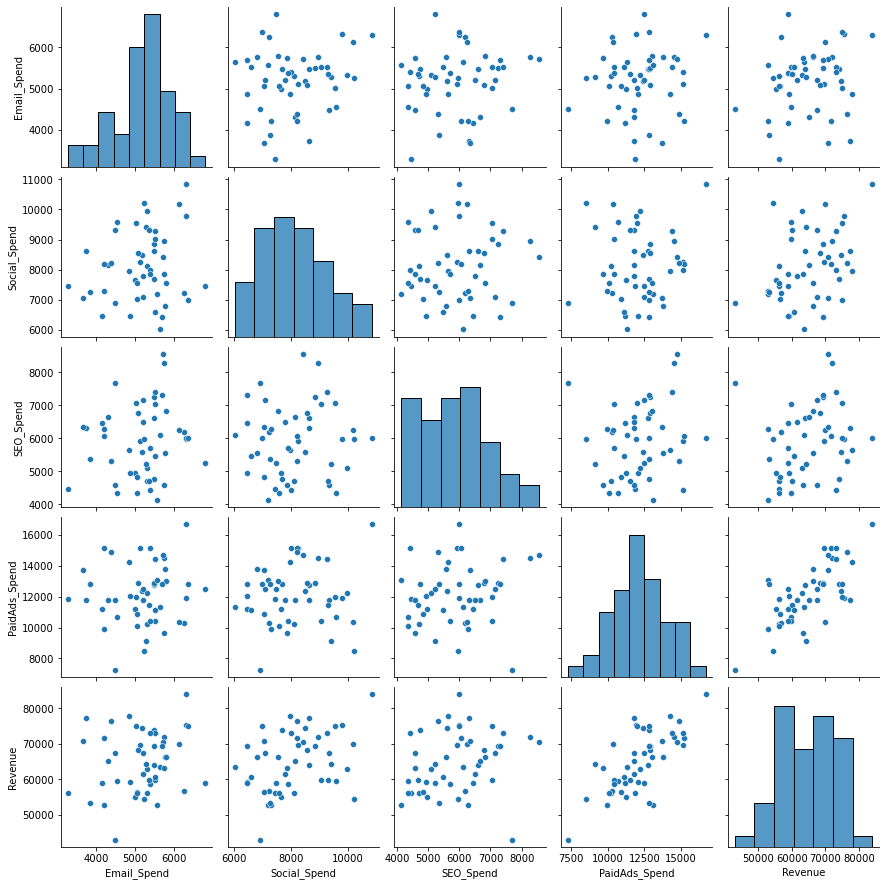

               Email_Spend  Social_Spend  SEO_Spend  PaidAds_Spend   Revenue
Email_Spend       1.000000      0.167462   0.123417       0.083389  0.196365
Social_Spend      0.167462      1.000000   0.057087       0.080759  0.370673
SEO_Spend         0.123417      0.057087   1.000000       0.152026  0.240586
PaidAds_Spend     0.083389      0.080759   0.152026       1.000000  0.702283
Revenue           0.196365      0.370673   0.240586       0.702283  1.000000


In [2]:
sns.pairplot(df)
plt.show()

print(df.corr())  # See correlation with Revenue


In [3]:
# Features and target
X = df[["Email_Spend", "Social_Spend", "SEO_Spend", "PaidAds_Spend"]]
y = df["Revenue"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)


         Feature  Coefficient
0    Email_Spend     0.948810
1   Social_Spend     2.061740
2      SEO_Spend     1.537961
3  PaidAds_Spend     2.527365


R2 Score: 0.7798891665939549
RMSE: 4288.44392627005


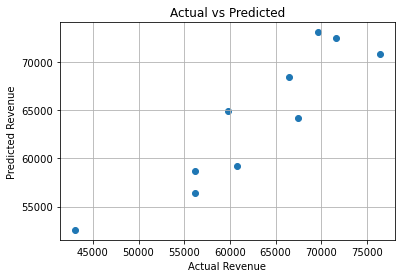

In [4]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualize
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [15]:
model.predict([[6000,10000,15000,7000]])


/home/vineet/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70938.90092114])

In [17]:
# New month budget
new_data = pd.DataFrame({
    "Email_Spend": [6000],
    "Social_Spend": [10000],
    "SEO_Spend": [7000],
    "PaidAds_Spend": [15000],
})

# Predict revenue
predicted = model.predict(new_data)
print("Predicted Revenue:", predicted[0])


Predicted Revenue: 78854.12817608411


In [18]:
from sklearn.linear_model import Lasso, Ridge

# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# Fit models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Evaluate
for name, model in [("Linear", model), ("Lasso", lasso), ("Ridge", ridge)]:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} Regression → R²: {r2:.3f}, RMSE: {rmse:.2f}")


Linear Regression → R²: 0.780, RMSE: 4288.44
Lasso Regression → R²: 0.780, RMSE: 4288.44
Ridge Regression → R²: 0.780, RMSE: 4288.44


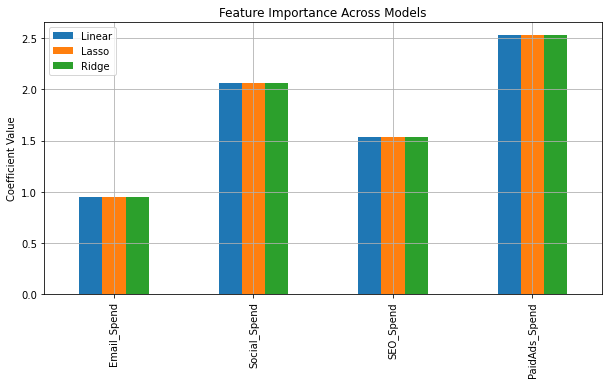

In [19]:
# Plot coefficients
coefs = pd.DataFrame({
    'Linear': model.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
}, index=X.columns)

coefs.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance Across Models")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()


In [20]:
import joblib

joblib.dump(model, 'revenue_model.pkl')


['revenue_model.pkl']